In [1]:
import pandas as pd

### Load Dataset

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### EDA

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

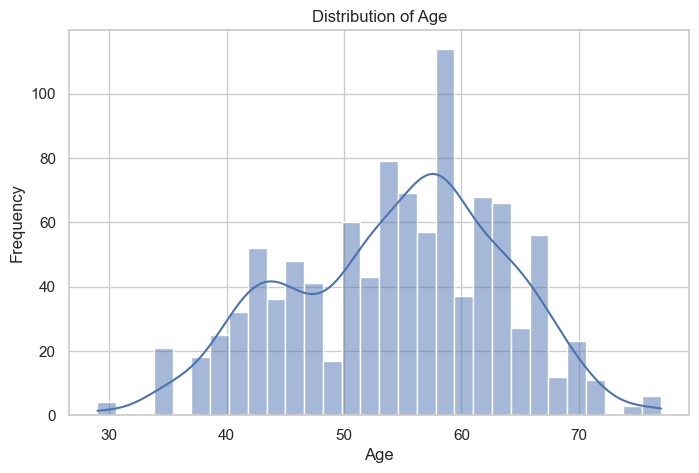

In [9]:
sns.set(style='whitegrid')

# Plot the distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(heart_df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

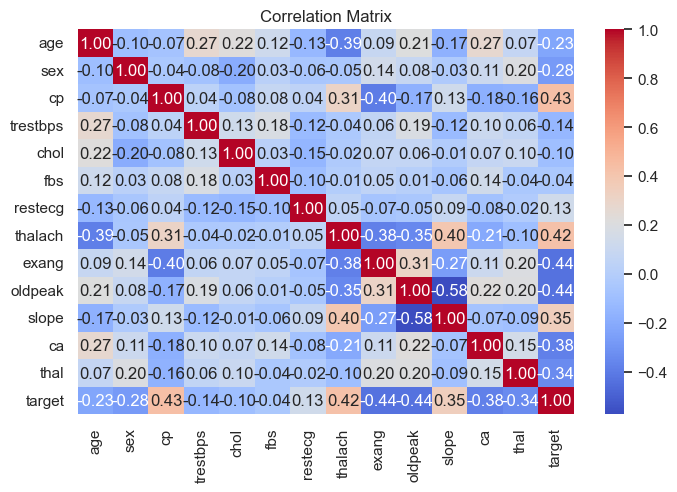

In [10]:
# Plot the correlation matrix
plt.figure(figsize=(8, 5))
correlation_matrix = heart_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Questions to Answer

1. What is the average age of patients with heart disease?
2. Is there a significant difference in cholesterol levels between patients with and without heart disease?
3. What is the distribution of chest pain types among patients with heart disease
4. How does the maximum heart rate achieved differ between patients with and without heart disease

In [11]:
#question 1
avg_age_heart_disease = df[df['target'] == 1]['age'].mean()
print(f"1. The average age of patients with heart disease is: {avg_age_heart_disease:.2f} years")

1. The average age of patients with heart disease is: 52.41 years


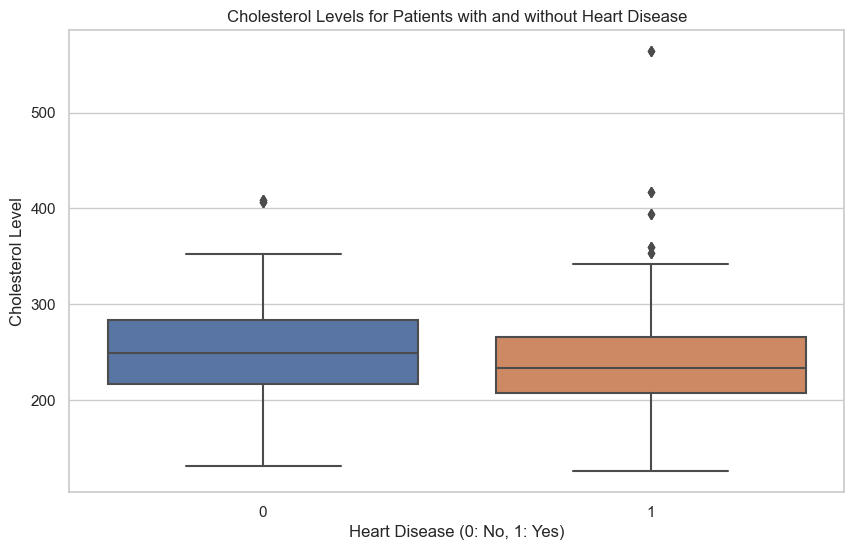

In [12]:
#question 2
chol_heart_disease = df[df['target'] == 1]['chol']
chol_no_heart_disease = df[df['target'] == 0]['chol']

#plot figure for question 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

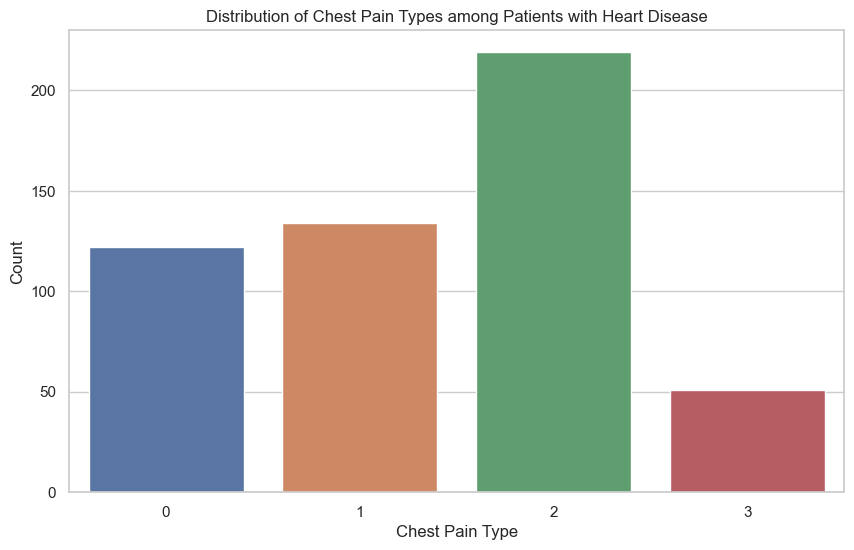

In [13]:
#question 3
cp_distribution = df[heart_df['target'] == 1]['cp'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=cp_distribution.index, y=cp_distribution.values)
plt.title('Distribution of Chest Pain Types among Patients with Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

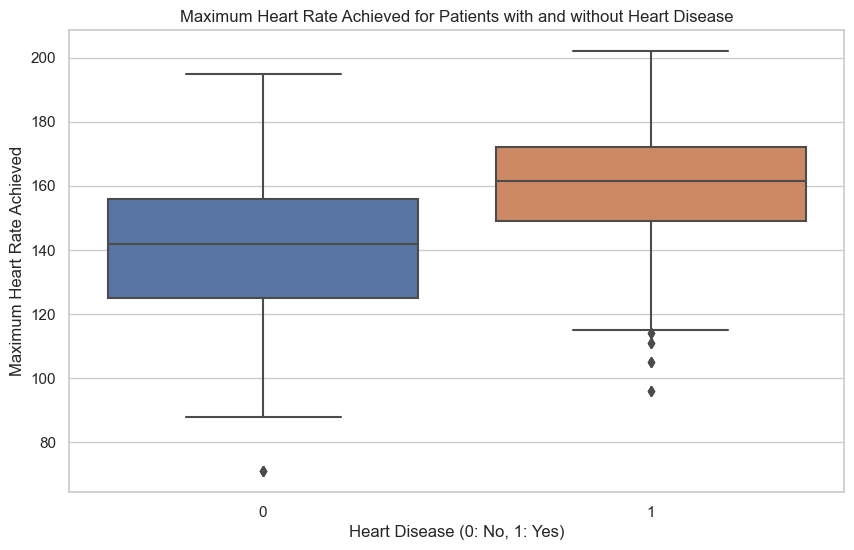

In [14]:
#question 4
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate Achieved for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()